# 기계학습및실습 2024 2학기 중간과제
## 타이타닉 데이터셋 분석
##### 인공지능융합학부 김하랑(2022101473)

## 데이터 불러오기

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("./data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.shape

(891, 12)

In [50]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 기초 데이터 분석

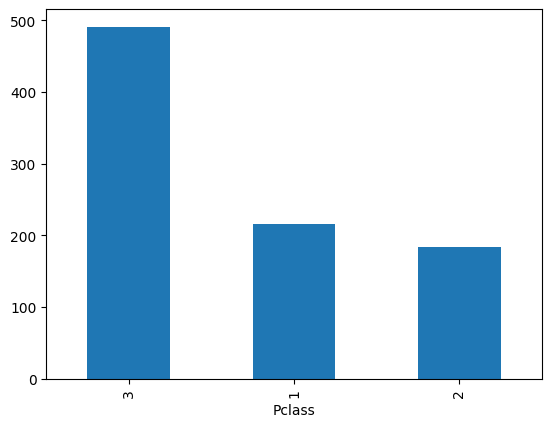

In [51]:
df["Pclass"].value_counts().plot(kind="bar", x="Pclass")
plt.show()

In [52]:
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 데이터 전처리
- Age의 결측값을 중앙값으로 채움
- Embarked의 결측값을 'S'로 채움
- Cabin의 결측값을 'U'로 채움

In [53]:
print(df.isnull().sum()) # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [54]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna('S')

df['Cabin'] = df['Cabin'].fillna('U')

In [55]:
# 결측치 처리 후 확인
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# 데이터 변환
- Sex: 'male'은 0, 'female'은 1로 변환
- Embarked: 'S', 'C', 'Q'를 각각 0, 1, 2로 변환

In [56]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 생존자와 사망자 수

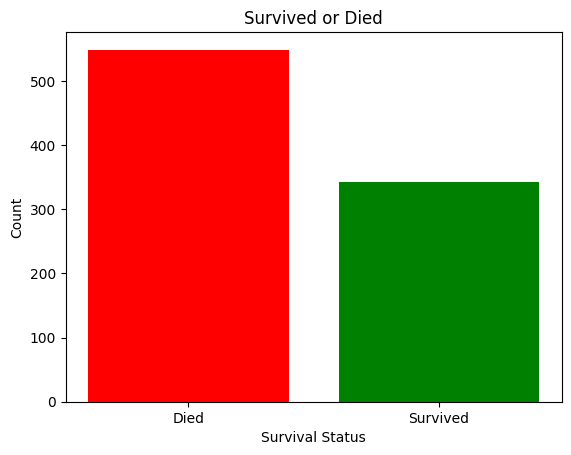

In [57]:
survived_count = df['Survived'].value_counts()

plt.bar(survived_count.index, survived_count.values, color=['red', 'green'])
plt.xticks([0, 1], ['Died', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survived or Died')
plt.show()

# 성별에 따른 생존율

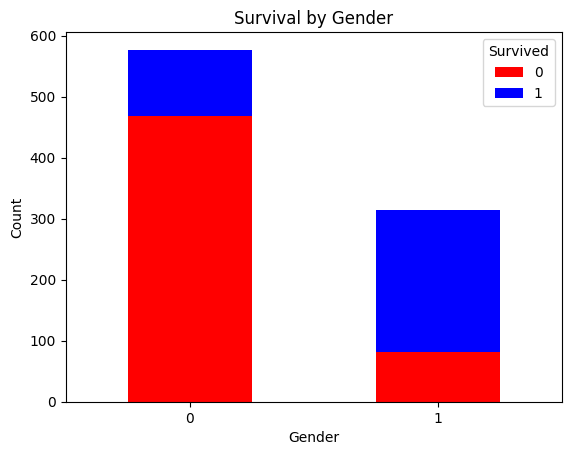

In [58]:
gender_survival = df.groupby(['Sex', 'Survived']).size().unstack()

gender_survival.plot(kind='bar', stacked=True, color=['red','blue'])
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 나이별 생존율

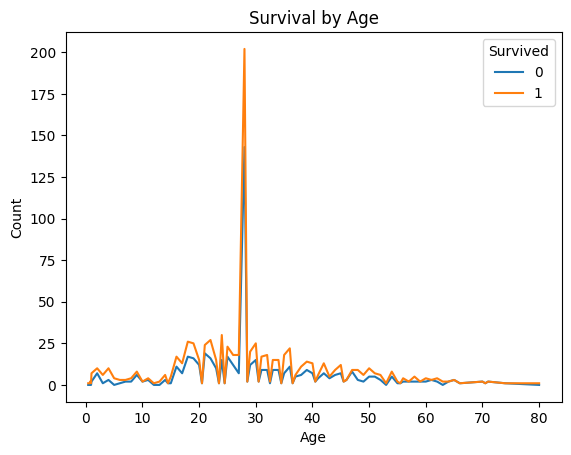

In [59]:
age_survival = df.groupby(['Age', 'Survived']).size().unstack().fillna(0)

age_survival.plot(kind='line', stacked=True)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Pclass에 따른 생존율

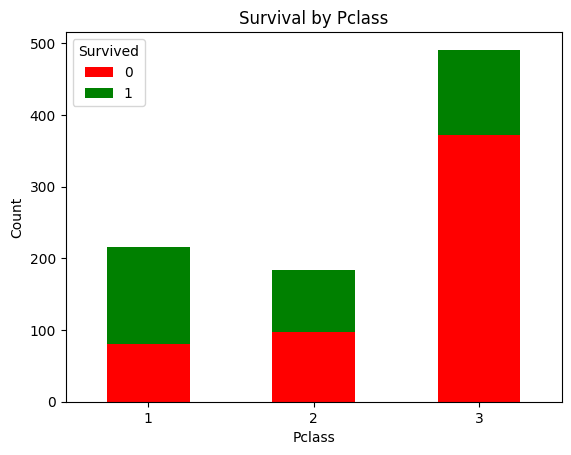

In [60]:
pclass_survival = df.groupby(['Pclass', 'Survived']).size().unstack()

pclass_survival.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 경제적 배경에 따른 생존율

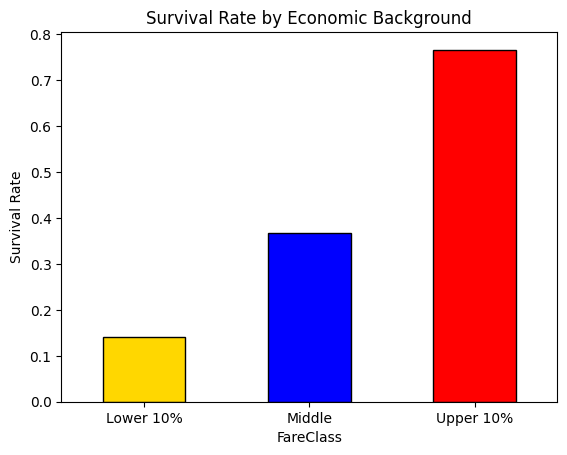

In [61]:
# 요금 기준 상위/하위 10% 구분
fare_threshold_upper = df['Fare'].quantile(0.9)
fare_threshold_lower = df['Fare'].quantile(0.1)

df['FareClass'] = df['Fare'].apply(
    lambda x: 'Upper 10%' if x >= fare_threshold_upper else ('Lower 10%' if x <= fare_threshold_lower else 'Middle')
)

fare_class_survival = df.groupby('FareClass')['Survived'].mean()

fare_class_survival.plot(kind='bar', color=['gold', 'blue', 'red'], edgecolor='black')
plt.title('Survival Rate by Economic Background')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

# 직함에 따른 생존율(어린이/서민/귀족/전문직)

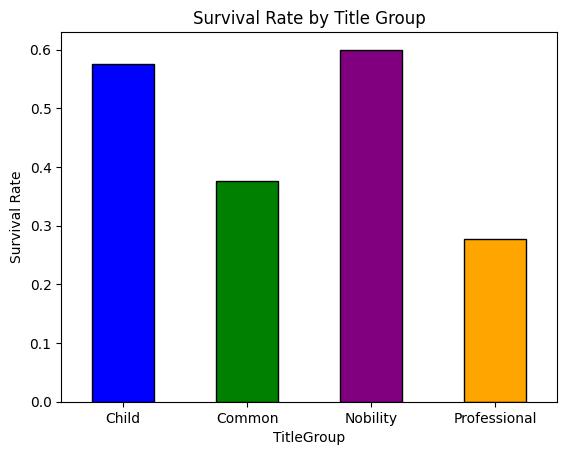

TitleGroup
Common          828
Child            40
Professional     18
Nobility          5
Name: count, dtype: int64


In [62]:
def classify_title(title):
    if title in ['Dr', 'Rev', 'Major', 'Col', 'Capt']:
        return 'Professional'
    elif title in ['Countess', 'Lady', 'Sir', 'Don', 'Jonkheer']:
        return 'Nobility'
    elif title in ['Mr', 'Mrs', 'Miss', 'Ms', 'Mlle', 'Mme']:
        return 'Common'
    elif title == 'Master':
        return 'Child'
    else:
        return 'Other'

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['TitleGroup'] = df['Title'].apply(classify_title)

title_group_survival = df.groupby('TitleGroup')['Survived'].mean()

title_group_survival.plot(kind='bar', color=['blue', 'green', 'purple', 'orange'], edgecolor='black')
plt.title('Survival Rate by Title Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

title_group_counts = df['TitleGroup'].value_counts()
print(title_group_counts)

# 가족 동반 여부에 따른 생존율

WithFamily
Alone          0.303538
With Family    0.505650
Name: Survived, dtype: float64


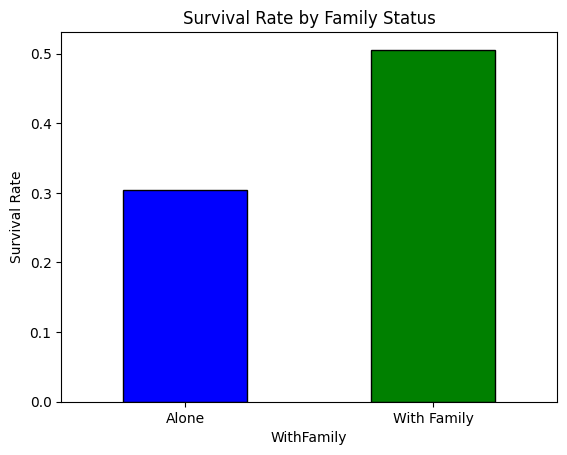

In [63]:
# FamilySize 계산: 형제자매/배우자 수(SibSp) + 부모/자녀 수(Parch) + 본인(1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 가족 동반 여부 컬럼 생성
df['WithFamily'] = df['FamilySize'].apply(lambda x: 'With Family' if x > 1 else 'Alone')

# 그룹별 생존율 계산
family_survival = df.groupby('WithFamily')['Survived'].mean()

# 결과 출력
print(family_survival)

# 시각화
family_survival.plot(kind='bar', color=['blue', 'green'], edgecolor='black')
plt.title('Survival Rate by Family Status')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

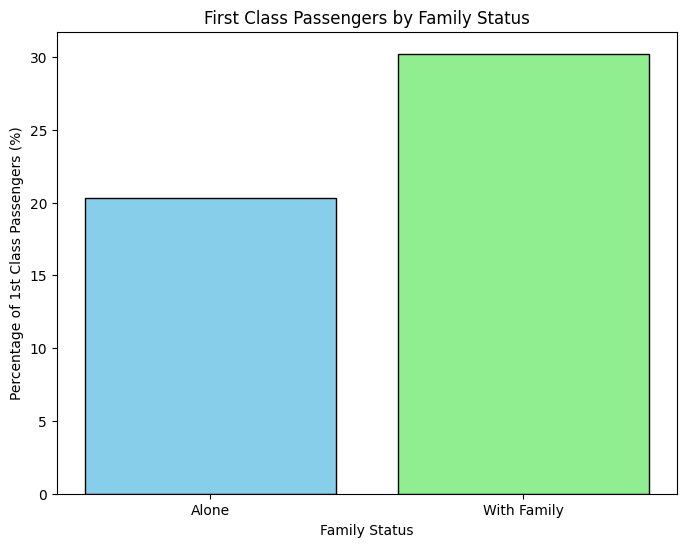

In [64]:
alone_passengers = df[df['WithFamily'] == 'Alone']
with_family_passengers = df[df['WithFamily'] == 'With Family']

# 혼자
alone_first_class_percentage = len(alone_passengers[alone_passengers['Pclass'] == 1]) / len(alone_passengers) * 100

# 가족과 함께
with_family_first_class_percentage = len(with_family_passengers[with_family_passengers['Pclass'] == 1]) / len(with_family_passengers) * 100

categories = ['Alone', 'With Family']
percentages = [alone_first_class_percentage, with_family_first_class_percentage]

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('First Class Passengers by Family Status')
plt.ylabel('Percentage of 1st Class Passengers (%)')
plt.xlabel('Family Status')
plt.show()

In [65]:
# 훈련 데이터와 테스트 데이터로 나누기
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# 훈련/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# 모델 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [68]:
# 정확도 출력
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


# 결론

1. **성별 및 나이:** 여성과 아이들의 생존율이 높았으며, 이는 구조 당시 "여성과 아이 우선 구조" 원칙이 영향을 미쳤을 것으로 보인다
2. **객실 등급:** 상류층일수록 생존율이 높고, 하위층은 상대적으로 생존율이 낮은 경향을 보인다. 이는 사회적 지위에 따른 구명보트 접근 가능성의 차이에서 생존여부가 갈린 것으로 추정된다
3. **직함별 생존율:** 귀족 직함을 가진 그룹의 생존율이 가장 높고, 그 다음 아이, 일반인, 전문직 순이다. 이는 1번과 2번 분석의 신뢰도를 뒷받침한다
4. **가족 동반 여부:** 가족을 동반한 탑승객의 생존율이 높고, 혼자인 탑승객의 생존율이 낮다. 각각의 1등석 비율을 보면 가족 동반 탑승객의 비율이 더 높다. 이는 객실 등급과 가족 동반 여부 간의 관계를 암시한다.